In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium, calculate
import numpy as np
from pycalphad.tests.datasets import *
dbf = Database('alzn_mey.tdb')

In [2]:
from pycalphad.core.solver import InteriorPointSolver
class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)
#v.T.default_value = 300
eq2 = equilibrium(dbf, ['AL', 'ZN', 'VA'], ['FCC_A1', 'LIQUID', 'HCP_A3'],
                 {v.X('ZN'): 1e-3, v.NP('LIQUID'): 1e-3,
                  v.P: 1e5}, verbose=True, solver=ProblemSaver())
print(eq2)

Components: AL VA ZN
Phases: FCC_A1 
HCP_A3 
LIQUID 
[done]
Composition Sets [CompositionSet(FCC_A1, [0.12024048 0.87975952], NP=0.3333333333333333, GM=-10489.356271065852), CompositionSet(HCP_A3, [1.e-13 1.e+00], NP=0.3333333333333333, GM=-12489.369042323267), CompositionSet(LIQUID, [0.00200401 0.99799599], NP=0.001 [fixed], GM=-8422.501520948857)]
Chemical Potentials [0. 0.]
Trying to improve poor solution
Chemical Potentials [-28221.13721901 -85342.64062357]
[ 1.00000000e+00  1.00000000e+05  9.99999999e-05 -2.60627075e-11
  0.00000000e+00  3.72324394e-11  1.00000000e+06  1.00000000e+03
  6.36824117e+01 -7.07161713e-05 -1.36278686e-08]
[1.00000000e+00 1.00000000e+05 9.28031190e+02 9.99970699e-01
 2.93005242e-05 3.44941624e-01 6.55058376e-01 9.99913560e-01
 8.64397802e-05 9.98418091e-01 1.48190943e-03 9.99999999e-05]
Status: 2 b'Algorithm converged to a point of local infeasibility. Problem may be infeasible.'
Rebuilding grid {'N': 1.0, 'P': 100000.0, 'T': 928.0311895921062}
Adding Co

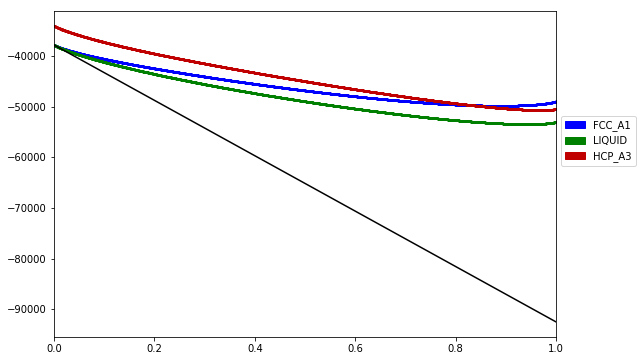

In [3]:
%matplotlib inline
from pycalphad import calculate
from pycalphad.plot.utils import phase_legend
import numpy as np
import matplotlib.pyplot as plt

my_phases = ['FCC_A1', 'LIQUID', 'HCP_A3']
legend_handles, colorlist = phase_legend(my_phases)
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(dbf, ['AL', 'ZN', 'VA'], name, P=101325, T=float(eq2['T'].values.flat[0]), output='GM')
    ax.scatter(result.X.sel(component='ZN'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))

ax.plot([0,1], eq2['MU'].values.flatten(), c='k')
#plt.xlim((0,0.01))
#plt.ylim((-40000, -30000))
plt.show()